#Import Libraries


In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')



## Read Data

In [3]:
df=pd.read_csv(r"/content/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


## Handling missing valuse

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [5]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

## handling outliner

In [6]:
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)

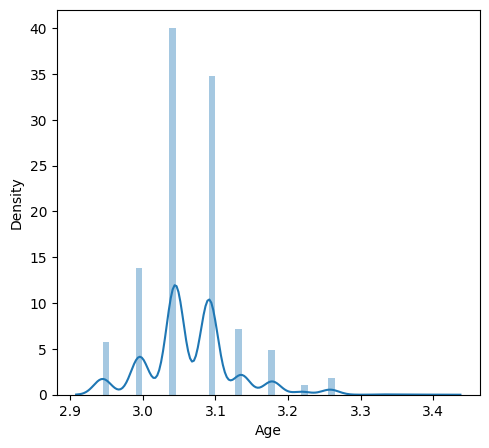

In [7]:
transformationplot(np.log(df['Age']))

## Handling categorical values

In [8]:
df=df.replace(['Male'],[0])
df=df.replace(['Female'],[1])

In [9]:
df=df.replace(['Electronics And Communication', 'Computer Science','Information Technology', 'Mechanical', 'Electrical', 'Civil'],[0,1,2,3,4,5])

In [10]:
df=df.drop(['Hostel'],axis=1)

In [11]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,0,1,8,1,1
1,21,1,1,0,7,1,1
2,22,1,2,1,6,0,1
3,21,0,2,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,2,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,2,1,7,0,0
2964,22,0,1,1,7,0,0


## Univariate Analysis

<Axes: xlabel='CGPA', ylabel='Density'>

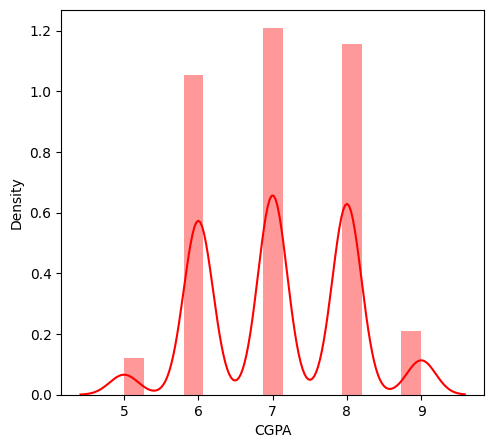

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')

<Axes: xlabel='PlacedOrNot', ylabel='Density'>

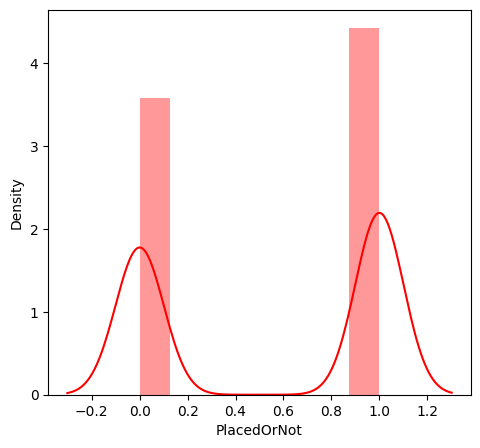

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='r')

## Bivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

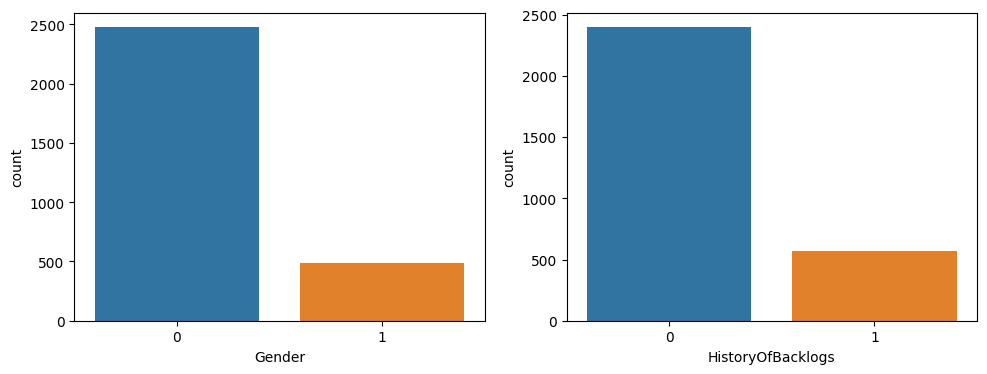

In [14]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.countplot(df,x='Gender')
plt.subplot(1,3,2)
sns.countplot(df,x='HistoryOfBacklogs')
plt.show

## Multivariate Analysis

<Axes: xlabel='PlacedOrNot', ylabel='count'>

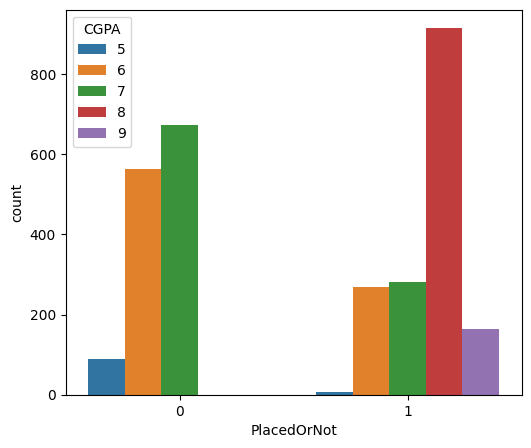

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(df,x='PlacedOrNot',hue=df['CGPA'])

<Axes: xlabel='PlacedOrNot', ylabel='CGPA'>

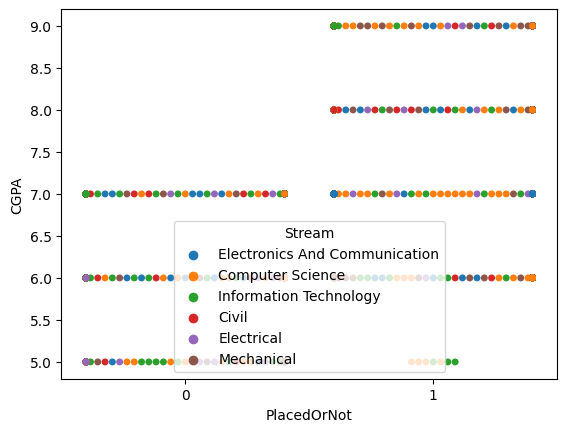

In [ ]:
sns.swarmplot(data=df,x='PlacedOrNot',y='CGPA',hue='Stream')

## Splitting The Data Into Train And Test

In [16]:
x=df.drop('PlacedOrNot',axis=1)
y=df['PlacedOrNot']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

## SVM Model

In [18]:
classifier=svm.SVC(kernel='linear')

In [19]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [20]:
x_train_prediction=classifier.predict(x_train)
traning_df_accuracy=accuracy_score(x_train_prediction,y_train)

In [21]:
print('accuracy score of training data:',traning_df_accuracy)

accuracy score of training data: 0.769814502529511


## KNN Model

In [22]:
best_k={"Regular":0}
best_score={"Regular":0}
for k in range(3,50,2):
  knn_temp=KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(x_train,y_train)
  knn_temp_pred=knn_temp.predict(x_test)
  score=metrics.accuracy_score(y_test,knn_temp_pred)*100
  if score>=best_score["Regular"]and score<100:
    best_score["Regular"]=score
    best_k["Regular"]=k

In [23]:
print("---results---\nK:{}\nScore:{}".format(best_k,best_score))
knn=KNeighborsClassifier(n_neighbors=best_k["Regular"])
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
testd=accuracy_score(knn_pred,y_test)

---results---
K:{'Regular': 21}
Score:{'Regular': 88.38383838383838}


## Artificial Neural Network Model

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers

In [25]:
classifier = Sequential()
# input & 1st hidden layer  
classifier.add(keras.layers.Dense(6,activation='relu',input_dim=7))
classifier.add(keras.layers.Dropout(0.50))
# 2nd hidden layer
classifier.add(keras.layers.Dense(6,activation='relu'))
classifier.add(keras.layers.Dropout(0.50))
# output layer
classifier.add(keras.layers.Dense(1,activation='sigmoid')) 

In [26]:
#compiling model
loss_1=tf.keras.losses.BinaryCrossentropy()
classifier.compile(optimizer='Adam',loss=loss_1,metrics=['accuracy'])

In [27]:
x_train.shape

(2372, 6)

In [ ]:
#fitting model
classifier.fit(x_train,y_train,batch_size=20,epochs=100)

Epoch 1/100
119/119 [==============================] - 2s 2ms/step - loss: 3.5371 - accuracy: 0.4945
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 1.7741 - accuracy: 0.5341
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: 1.2300 - accuracy: 0.5097
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: 0.9497 - accuracy: 0.5249
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: 0.8268 - accuracy: 0.5354
Epoch 6/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7736 - accuracy: 0.5266
Epoch 7/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7440 - accuracy: 0.5282
Epoch 8/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.5409
Epoch 9/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7152 - accuracy: 0.5468
Epoch 10/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7027 - accura

## Save The Best Model


In [28]:
import pickle
pickle.dump(knn,open("placement.plk",'wb'))
model=pickle.load(open("placement.plk",'rb'))